In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Initialise dataframe with headers
col_names = ["type", "capshape", "capsurface", "capcolor", "bruises", "odor", "gillattachment", "gillspacing", "gillsize", "gillcolor", "stalkshape", "stalkroot", "stalksurfaceabovering", "stalksurfacebelowring", "stalkcolorabovering", "stalkcolorbelowring", "veiltype", "veilcolor", "ringnumber", "ringtype", "sporeprintcolor", "population", "habitat"]
mushroom_data = pd.read_csv('agaricus-lepiota.data', sep=',', names=col_names)
# Output dataframe contains 8124 entries

In [41]:
## DATA CLEANING
# Remove rows with ANY null values
X1 = mushroom_data.dropna()
# doesn't actually do anything because all "values" are present in the dataset
# Output dataframe contains 8124 entries

# In Column 11 "Stalk Root", remove all rows with missing ("?") values
X2 = X1[X1.stalkroot != "?"]
# Output dataframe contains 5644 entries
# So there were 2480 samples with no value for "Stalk Root"

## in subsequent visualisations, any calculation using "mushroom_data" is looking at original data
## while any calculation using "X2" is looking at our cleaned data

<AxesSubplot:ylabel='type'>

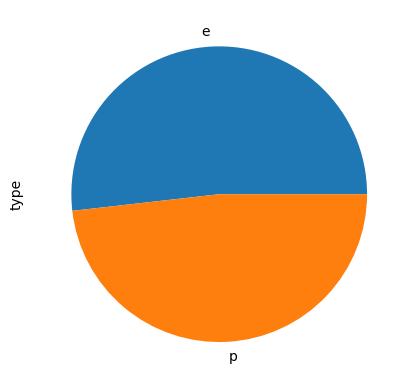

In [42]:
### Pie Chart of Count of Edible vs Poisonous BEFORE data cleaning
## Edible: 4208 (51.8%)
## Poisonous: 3916 (48.2%)
## Total: 8124 instances
mushroom_data.type.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='type'>

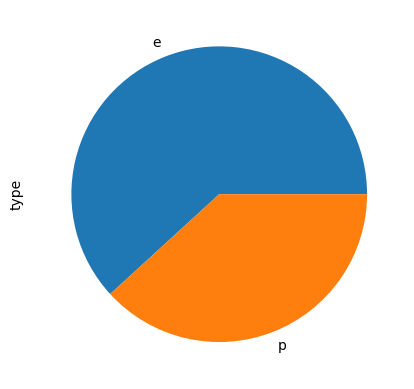

In [43]:
### Pie Chart of Count of Edible vs Poisonous AFTER data cleaning
## Edible: 3488 (61.8%)
## Poisonous: 2156 (38.2%)
## Total: 5644 instances
X2.type.value_counts().plot(kind="pie")

<AxesSubplot:>

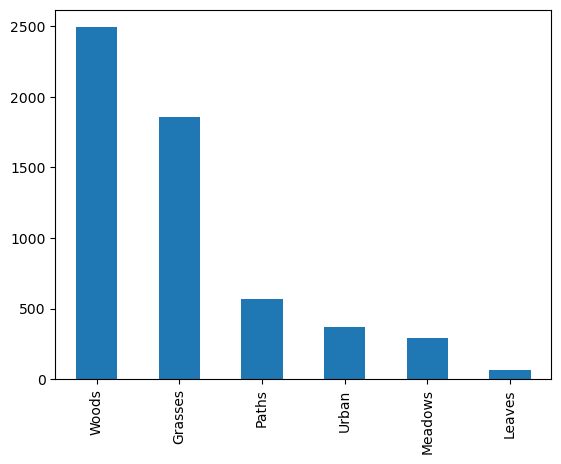

In [44]:
### Bar chart comparing the habitats of the mushroom samples AFTER cleaning
# Woods      2492
# Grasses    1860
# Paths       568
# Urban       368
# Meadows     292
# Leaves       64

# Create a dictionary for renaming habitat axis labels
habitat_dictionary = {
    "d": "Woods",
    "g": "Grasses",
    "p": "Paths",
    "u": "Urban",
    "m": "Meadows",
    "l": "Leaves"
}

# Use the dictionary in the .replace method, then get the counts and plot the bar chart
habitats = X2.replace(to_replace=habitat_dict)
habitats = habitats.habitat.value_counts()
habitats.plot(kind="bar")

In [46]:
## Cleaned training and target data, ready to split and train

# Training without the target column (22 Attributes)
X = X2.drop(columns=["type"])

# Initialise target column (Edible or Poisonous) in new dataframe
Y = X2["type"]

In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [65]:
encoded_X = ohe.fit_transform(X)
encoded_X

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [64]:
ohe.categories_

[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object),
 array(['f', 'g', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'p', 'w', 'y'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['a', 'c', 'f', 'l', 'm', 'n', 'p'], dtype=object),
 array(['a', 'f'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['g', 'h', 'k', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object),
 array(['e', 't'], dtype=object),
 array(['b', 'c', 'e', 'r'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['b', 'c', 'g', 'n', 'p', 'w', 'y'], dtype=object),
 array(['b', 'c', 'g', 'n', 'p', 'w', 'y'], dtype=object),
 array(['p'], dtype=object),
 array(['w', 'y'], dtype=object),
 array(['n', 'o', 't'], dtype=object),
 array(['e', 'l', 'n', 'p'], dtype=object),
 array(['h', 'k', 'n', 'r', 'u', 'w'], dtype=object),
 array(['a', 'c', 'n', 's', 'v', 'y'], dtype=object),
 array(['d', 'g', 'l', 'm', 'p', 'u'